<a href="https://colab.research.google.com/github/mazenbuk/intern/blob/main/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objects as go
import math

In [17]:
data = pd.read_csv('https://raw.github.com/mazenbuk/intern/main/cancer%20patient%20data%20sets.csv')

In [18]:
severity_levels = ['Low', 'Medium', 'High']

data['Level'] = pd.Categorical(data['Level'], categories=severity_levels, ordered=True)

In [19]:
data = data.drop(columns=['index', 'Patient Id'], axis=1)

In [20]:
data.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


#Correlation

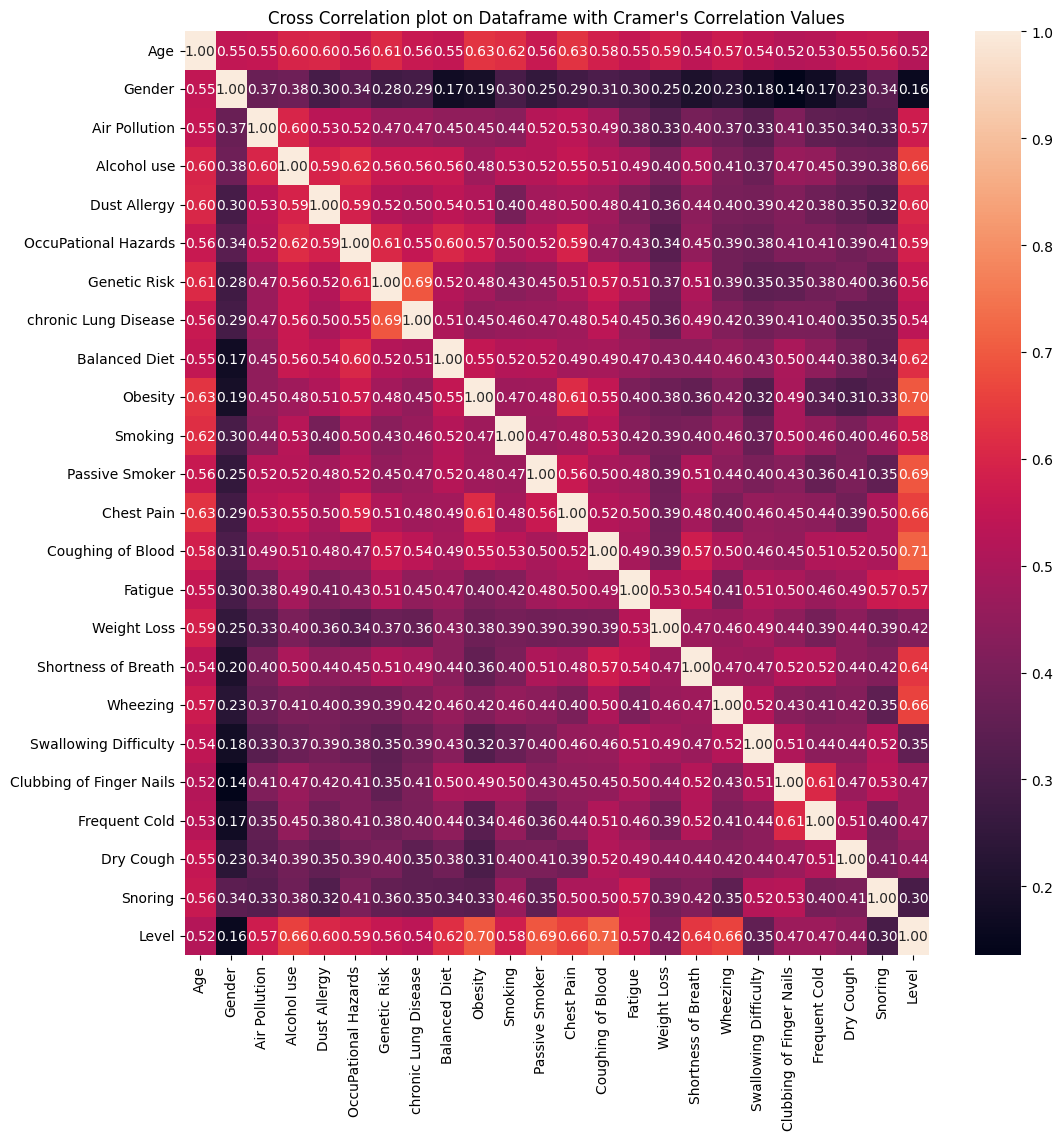

In [21]:
def cramerV(label,x):
    confusion_matrix = pd.crosstab(label, x)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r,k = confusion_matrix.shape
    phi2 = chi2/n
    phi2corr = max(0,phi2-((k-1)*(r-1))/(n-1))
    rcorr = r - ((r - 1) ** 2) / ( n - 1 )
    kcorr = k - ((k - 1) ** 2) / ( n - 1 )
    try:
        if min((kcorr - 1),(rcorr - 1)) == 0:
            v = 0
        else:
            v = np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))
    except:
        v = 0
    return v

def plot_cramer(df):
    cramer = pd.DataFrame(index=df.columns,columns=df.columns)
    for column_of_interest in df.columns:
        try:
            temp = {}

            columns = df.columns
            for j in range(0,len(columns)):
                v = cramerV(df[column_of_interest],df[columns[j]])
                cramer.loc[column_of_interest,columns[j]] = v
                if (column_of_interest==columns[j]):
                    pass
                else:
                    temp[columns[j]] = v
            cramer.fillna(value=np.nan,inplace=True)
        except:
            print('Dropping row:',column_of_interest)
            pass
    plt.figure(figsize=(12,12))
    sns.heatmap(cramer,annot=True,fmt='.2f')

    plt.title("Cross Correlation plot on Dataframe with Cramer's Correlation Values")
    plt.show()

plot_cramer(data)

#Likert Chart

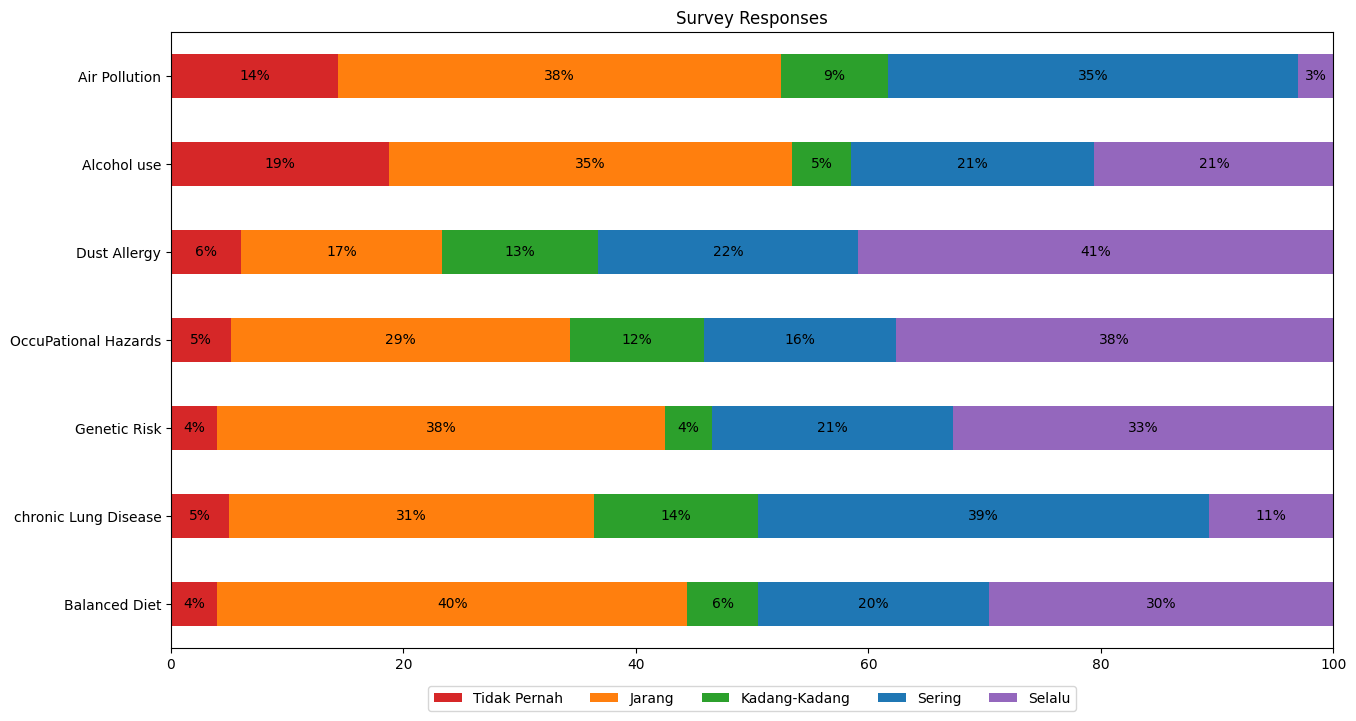

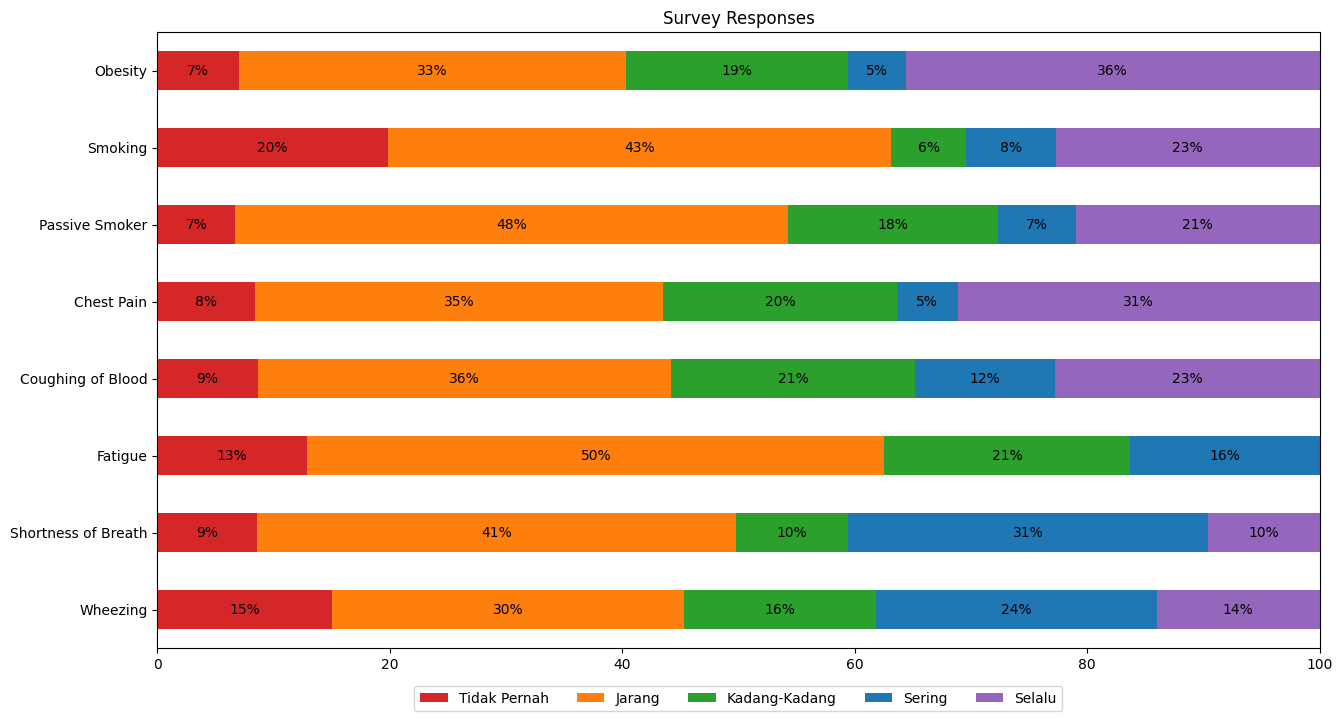

In [22]:
scale_mappings = {
    1: 'Tidak Pernah',
    2: 'Jarang', 3: 'Jarang',
    4: 'Kadang-Kadang',
    5: 'Sering', 6: 'Sering',
    7: 'Selalu'
}

# Kolom yang ingin dihapus
columns_drop = ['Age', 'Gender', 'Level', 'Weight Loss', 'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold', 'Dry Cough', 'Snoring']

# Filter kolom yang akan digunakan
columns = [col for col in data.columns if col not in columns_drop]

# Bagi kolom menjadi dua kelompok
mid_index = len(columns) // 2
first_half_columns = columns[:mid_index]
second_half_columns = columns[mid_index:]

# Map scale to data, lalu hitung frekuensi untuk setiap kelompok
first_half_data = data[first_half_columns].applymap(lambda x: scale_mappings.get(x, None))
first_half_counts = first_half_data.apply(lambda x: x.value_counts(normalize=True)).T * 100

second_half_data = data[second_half_columns].applymap(lambda x: scale_mappings.get(x, None))
second_half_counts = second_half_data.apply(lambda x: x.value_counts(normalize=True)).T * 100

ordered_categories = ['Tidak Pernah', 'Jarang', 'Kadang-Kadang', 'Sering', 'Selalu']
first_half_counts = first_half_counts[ordered_categories]
second_half_counts = second_half_counts[ordered_categories]

# Fungsi untuk plotting Likert
def plot_likert_scale(likert_counts):
    fig, ax = plt.subplots(figsize=(15, 8))
    likert_counts.plot(kind='barh', stacked=True,
                       color=['#d62728', '#ff7f0e', '#2ca02c', '#1f77b4', '#9467bd'], ax=ax)
    plt.title('Survey Responses')
    plt.xlim(0, 100)
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=len(likert_counts.columns))

    # Add the percentage text within the bars
    for n, x in enumerate([*likert_counts.index.values]):
        for (proportion, count, y_loc) in zip(likert_counts.loc[x],
                                              likert_counts.loc[x].cumsum(),
                                              likert_counts.loc[x].cumsum() - likert_counts.loc[x] / 2):
            if proportion > 0:
                ax.text(y_loc, n, f'{proportion:.0f}%', ha='center', va='center')

    # Invert the y-axis to have the first entry on top
    ax.invert_yaxis()

    plt.show()

plot_likert_scale(first_half_counts)
plot_likert_scale(second_half_counts)

#Swarmplot

In [23]:
columns

['Air Pollution',
 'Alcohol use',
 'Dust Allergy',
 'OccuPational Hazards',
 'Genetic Risk',
 'chronic Lung Disease',
 'Balanced Diet',
 'Obesity',
 'Smoking',
 'Passive Smoker',
 'Chest Pain',
 'Coughing of Blood',
 'Fatigue',
 'Shortness of Breath',
 'Wheezing']

#EDA

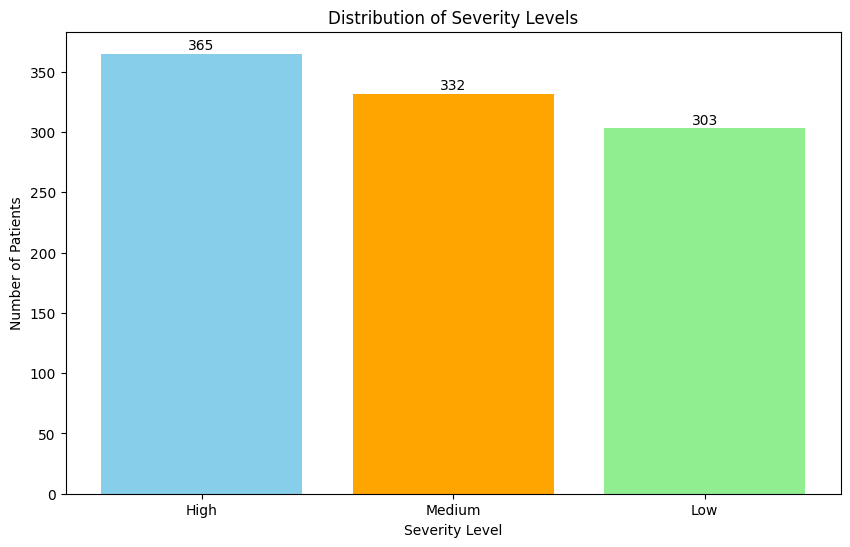

In [24]:
plt.figure(figsize=(10, 6))

level_counts = data['Level'].value_counts()
bars = plt.bar(level_counts.index, level_counts.values, color=['skyblue', 'orange', 'lightgreen'])

plt.title('Distribution of Severity Levels')
plt.xlabel('Severity Level')
plt.ylabel('Number of Patients')
plt.xticks(rotation=0)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, yval, ha='center', va='bottom')

plt.show()

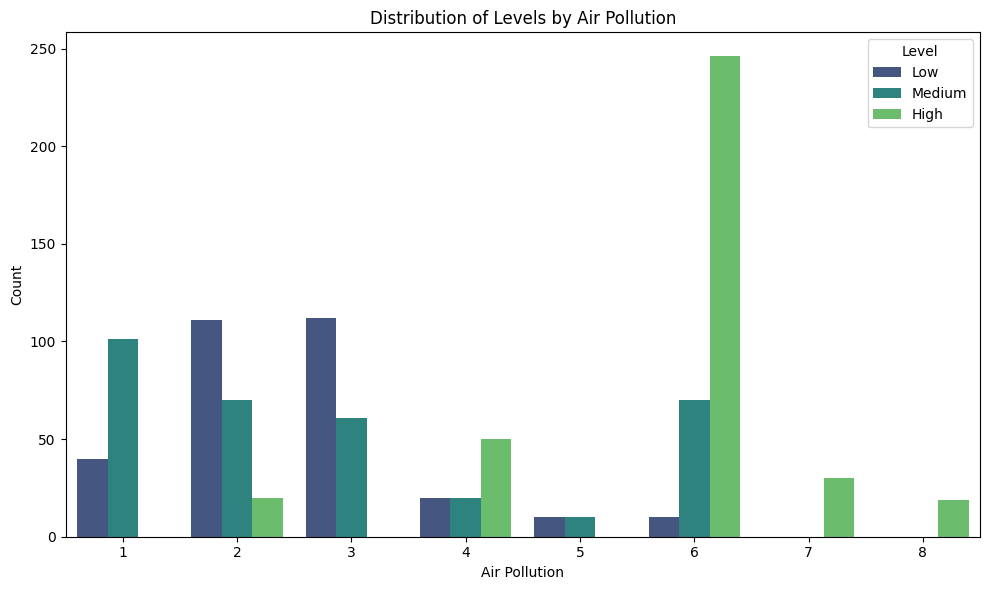

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Air Pollution', hue='Level', data=data, palette='viridis')
plt.title('Distribution of Levels by Air Pollution')
plt.xlabel('Air Pollution')
plt.ylabel('Count')
plt.legend(title='Level', loc='upper right')

plt.tight_layout()
plt.show()

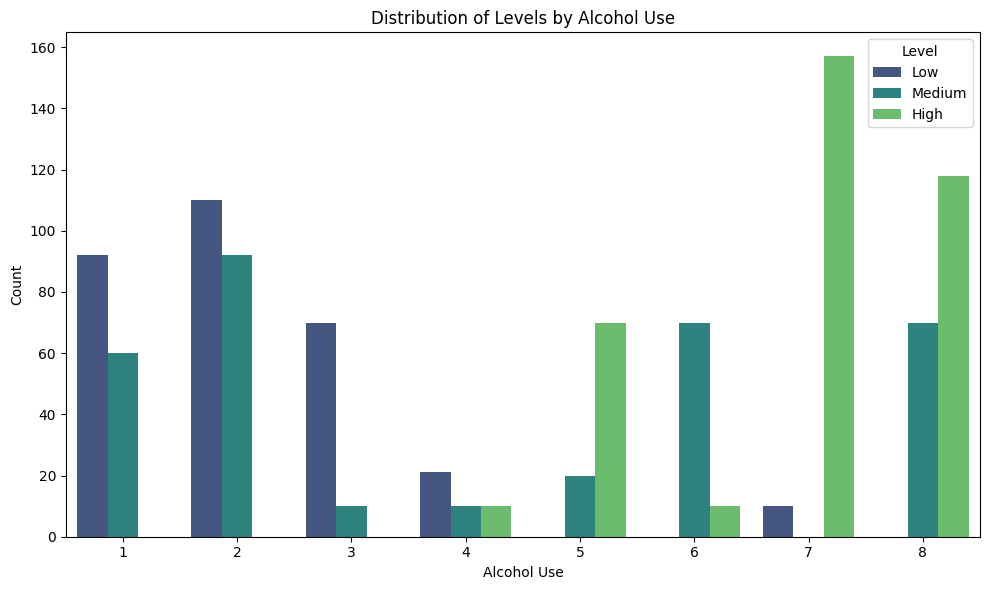

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Alcohol use', hue='Level', data=data, palette='viridis')
plt.title('Distribution of Levels by Alcohol Use')
plt.xlabel('Alcohol Use')
plt.ylabel('Count')
plt.legend(title='Level', loc='upper right')

plt.tight_layout()
plt.show()

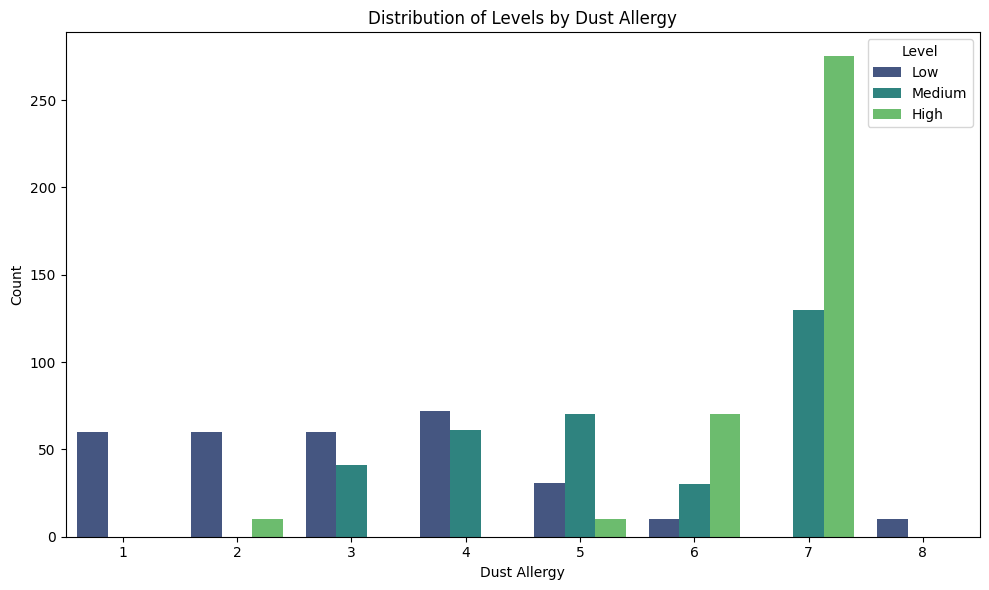

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Dust Allergy', hue='Level', data=data, palette='viridis')
plt.title('Distribution of Levels by Dust Allergy')
plt.xlabel('Dust Allergy')
plt.ylabel('Count')
plt.legend(title='Level', loc='upper right')

plt.tight_layout()
plt.show()

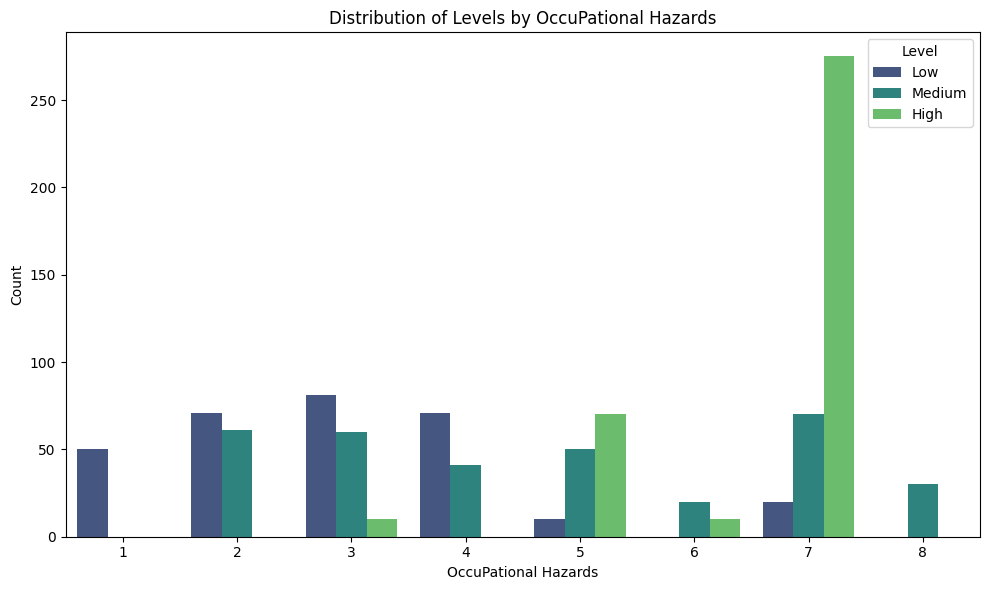

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(x='OccuPational Hazards', hue='Level', data=data, palette='viridis')
plt.title('Distribution of Levels by OccuPational Hazards')
plt.xlabel('OccuPational Hazards')
plt.ylabel('Count')
plt.legend(title='Level', loc='upper right')

plt.tight_layout()
plt.show()

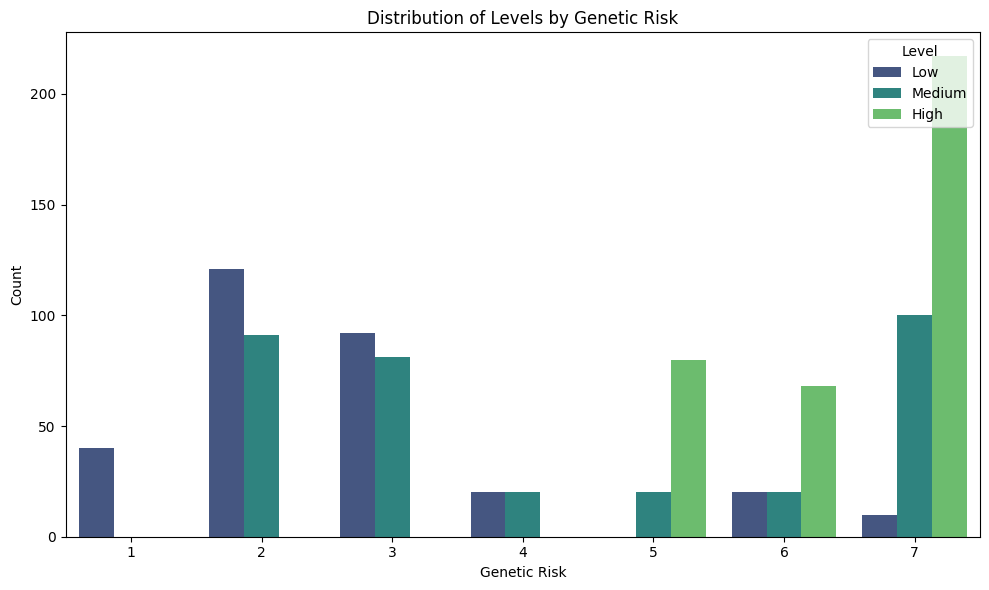

In [29]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Genetic Risk', hue='Level', data=data, palette='viridis')
plt.title('Distribution of Levels by Genetic Risk')
plt.xlabel('Genetic Risk')
plt.ylabel('Count')
plt.legend(title='Level', loc='upper right')

plt.tight_layout()
plt.show()

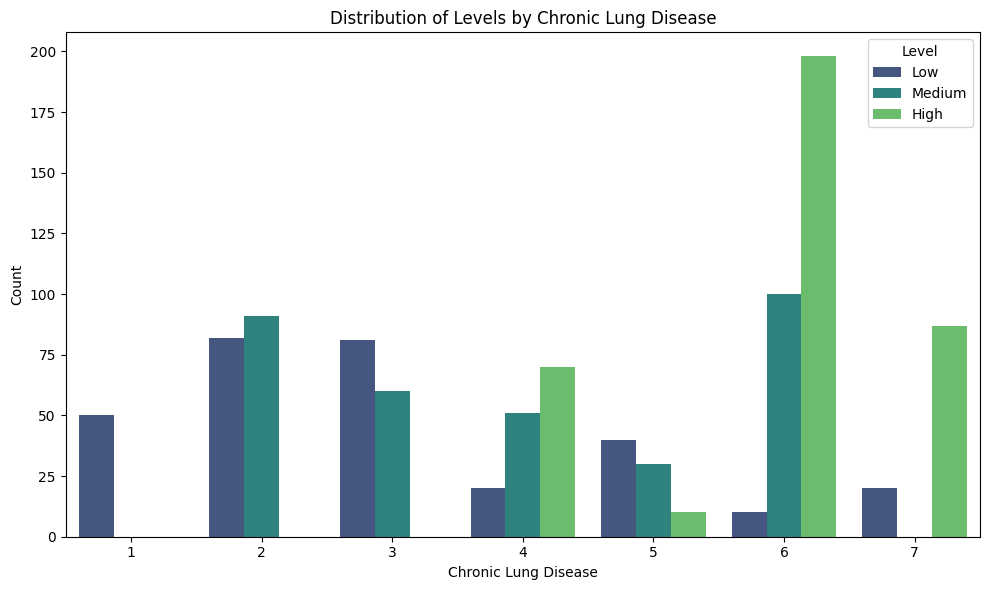

In [30]:
plt.figure(figsize=(10, 6))
sns.countplot(x='chronic Lung Disease', hue='Level', data=data, palette='viridis')
plt.title('Distribution of Levels by Chronic Lung Disease')
plt.xlabel('Chronic Lung Disease')
plt.ylabel('Count')
plt.legend(title='Level', loc='upper right')

plt.tight_layout()
plt.show()

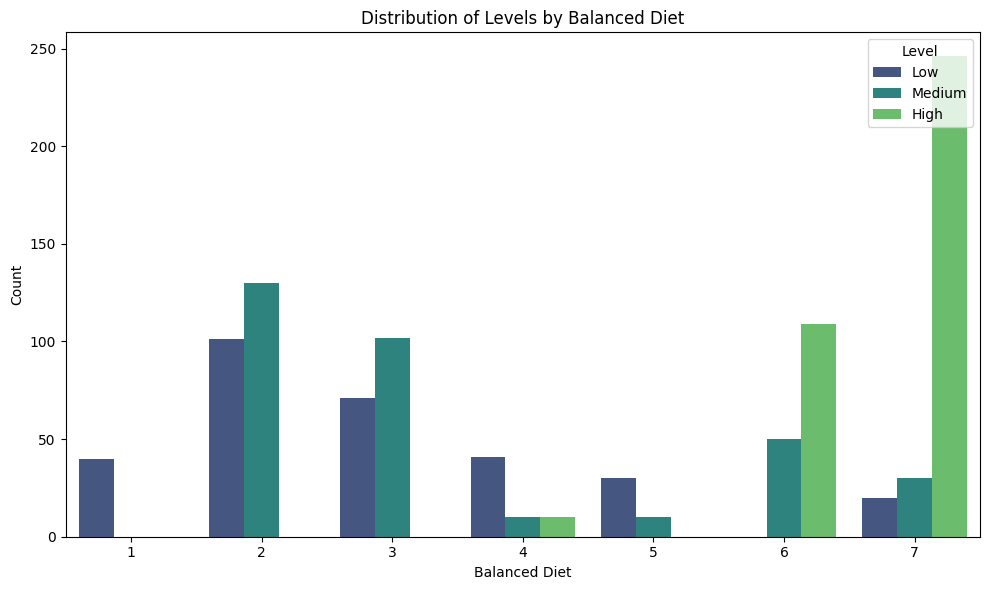

In [31]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Balanced Diet', hue='Level', data=data, palette='viridis')
plt.title('Distribution of Levels by Balanced Diet')
plt.xlabel('Balanced Diet')
plt.ylabel('Count')
plt.legend(title='Level', loc='upper right')

plt.tight_layout()
plt.show()

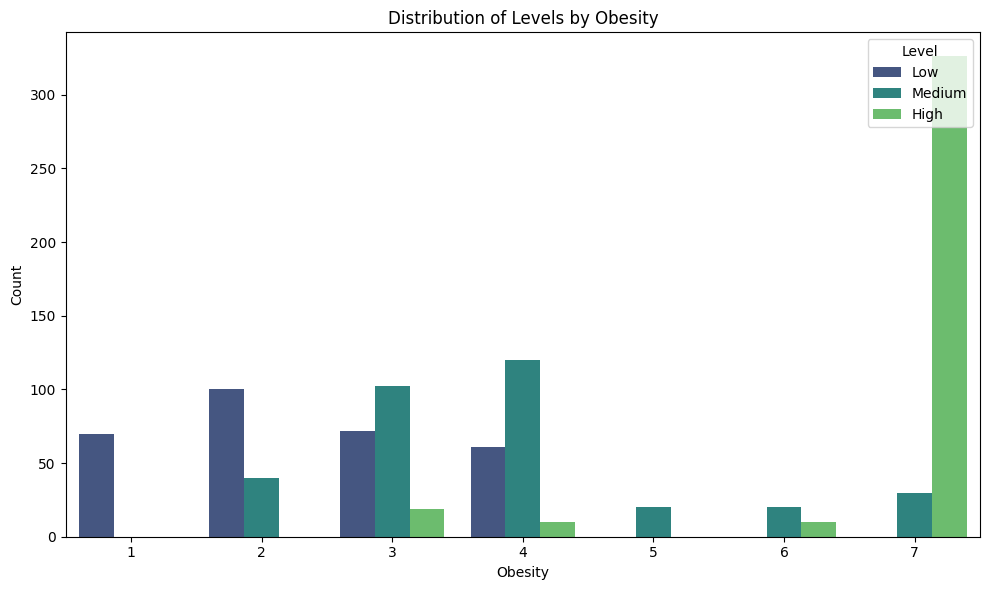

In [32]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Obesity', hue='Level', data=data, palette='viridis')
plt.title('Distribution of Levels by Obesity')
plt.xlabel('Obesity')
plt.ylabel('Count')
plt.legend(title='Level', loc='upper right')

plt.tight_layout()
plt.show()

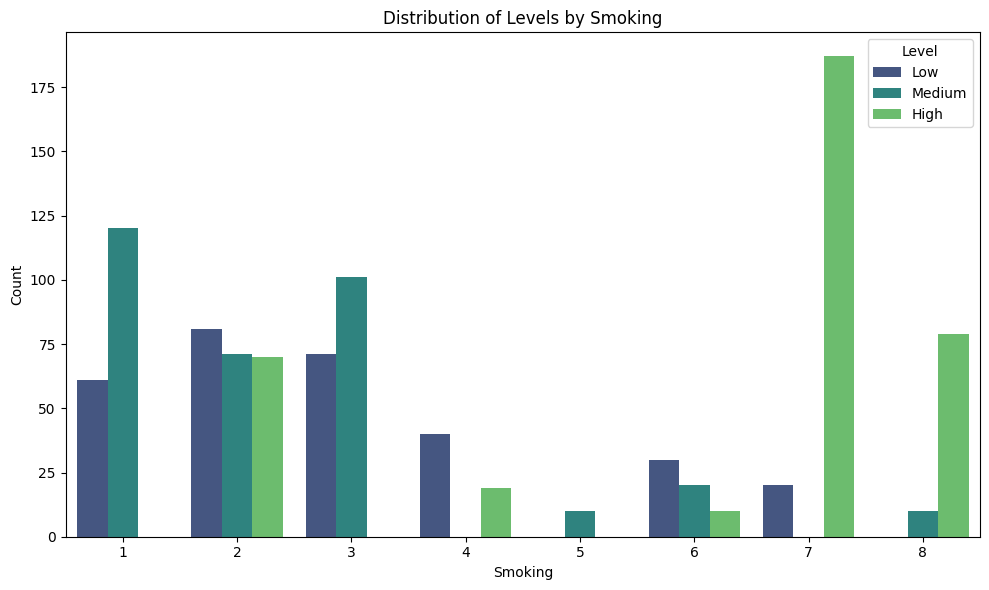

In [33]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Smoking', hue='Level', data=data, palette='viridis')
plt.title('Distribution of Levels by Smoking')
plt.xlabel('Smoking')
plt.ylabel('Count')
plt.legend(title='Level', loc='upper right')

plt.tight_layout()
plt.show()

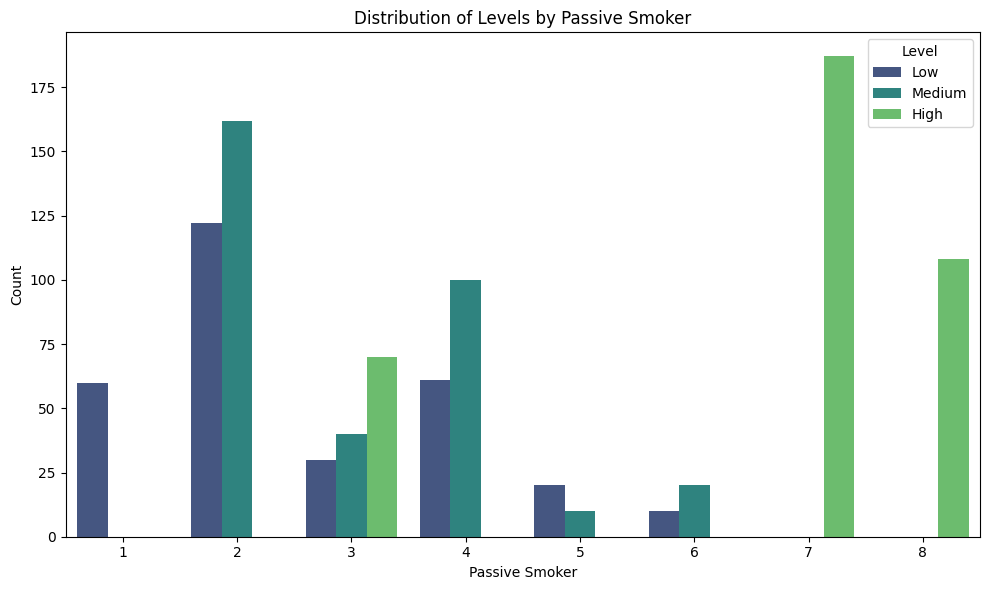

In [34]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Passive Smoker', hue='Level', data=data, palette='viridis')
plt.title('Distribution of Levels by Passive Smoker')
plt.xlabel('Passive Smoker')
plt.ylabel('Count')
plt.legend(title='Level', loc='upper right')

plt.tight_layout()
plt.show()

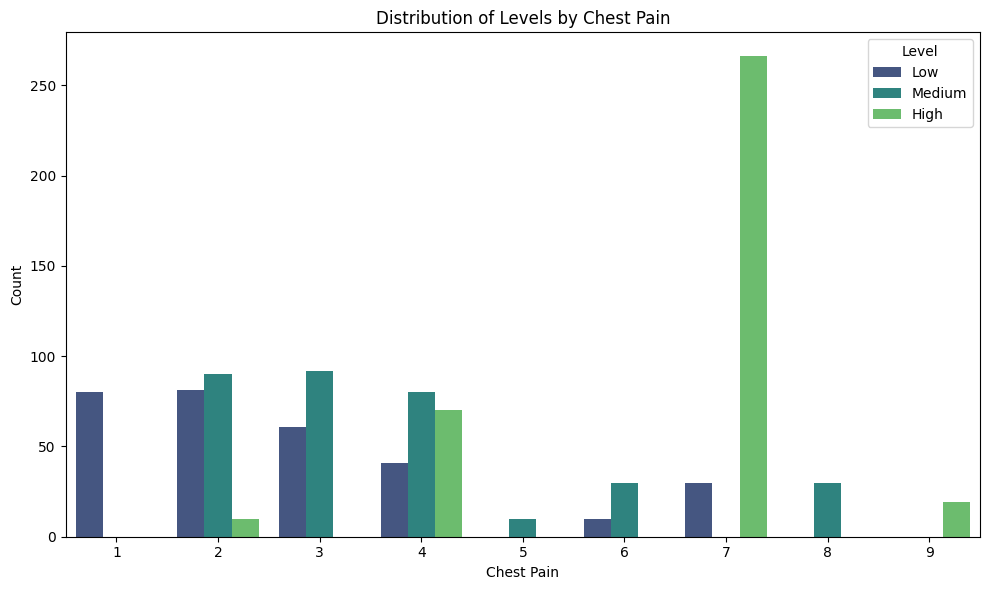

In [35]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Chest Pain', hue='Level', data=data, palette='viridis')
plt.title('Distribution of Levels by Chest Pain')
plt.xlabel('Chest Pain')
plt.ylabel('Count')
plt.legend(title='Level', loc='upper right')

plt.tight_layout()
plt.show()

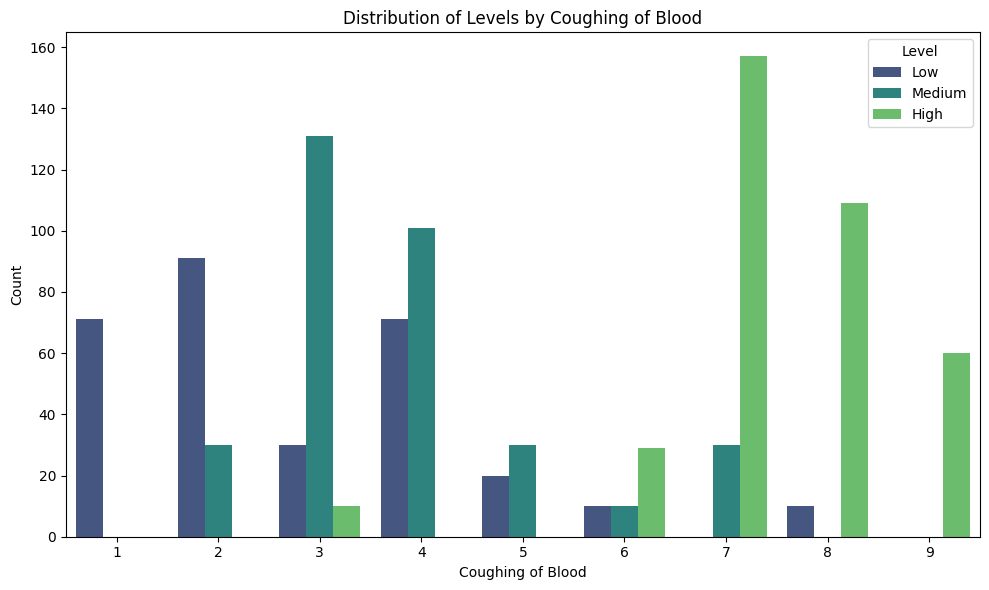

In [36]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Coughing of Blood', hue='Level', data=data, palette='viridis')
plt.title('Distribution of Levels by Coughing of Blood')
plt.xlabel('Coughing of Blood')
plt.ylabel('Count')
plt.legend(title='Level', loc='upper right')

plt.tight_layout()
plt.show()

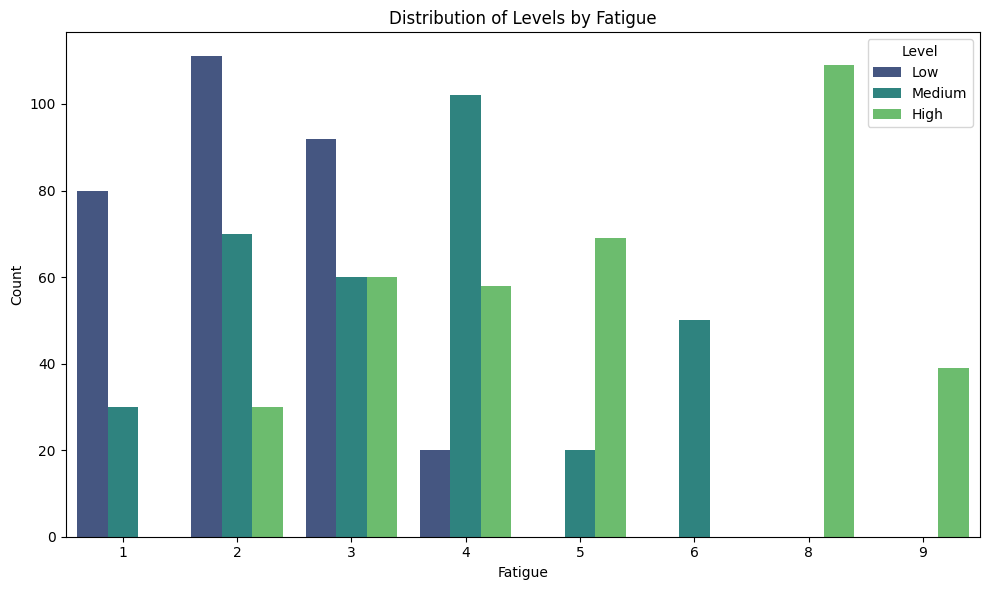

In [37]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Fatigue', hue='Level', data=data, palette='viridis')
plt.title('Distribution of Levels by Fatigue')
plt.xlabel('Fatigue')
plt.ylabel('Count')
plt.legend(title='Level', loc='upper right')

plt.tight_layout()
plt.show()

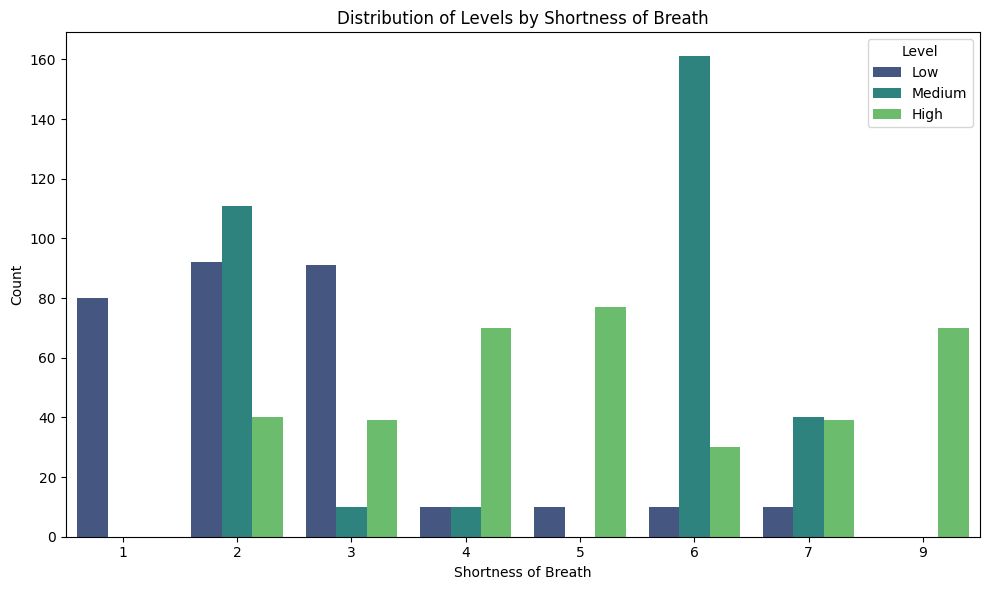

In [38]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Shortness of Breath', hue='Level', data=data, palette='viridis')
plt.title('Distribution of Levels by Shortness of Breath')
plt.xlabel('Shortness of Breath')
plt.ylabel('Count')
plt.legend(title='Level', loc='upper right')

plt.tight_layout()
plt.show()

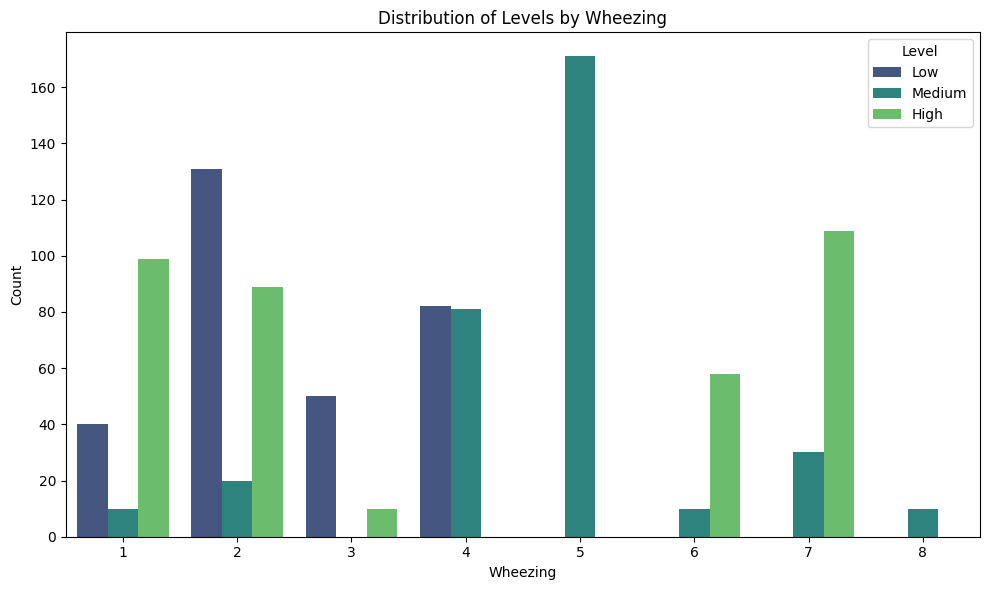

In [39]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Wheezing', hue='Level', data=data, palette='viridis')
plt.title('Distribution of Levels by Wheezing')
plt.xlabel('Wheezing')
plt.ylabel('Count')
plt.legend(title='Level', loc='upper right')

plt.tight_layout()
plt.show()